# Automatischer Löser für die _pq_-Formel

<IPython.core.display.Math object>

### Diskriminante:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### D = 0,&nbsp;&nbsp;&nbsp;also gibt es 1 Lösung:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Der Satz von Vieta gilt, wenn man die einzige Lösung doppelt zählt:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<div class="alert alert-block alert-success"><b>Ende der Berechnung,</b>&nbsp; der Rest ist Zusatzinfo&nbsp; (verständlicher, wenn ihr <i>quadratische Funktionen</i> schon behandelt habt): </div>

***

### Nullstellen der quadratischen Funktion

<IPython.core.display.Latex object>

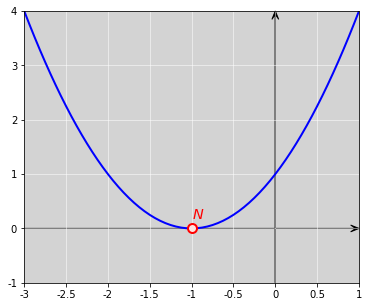

In [ ]:
from IPython.display import display, Math, Markdown, Latex, clear_output
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

from mDocUtils.numbers import *
from mDocUtils.quadratic import *
from mDocUtils.plotfunc import funcplot

F = OutputFormatter('tfrac')
F.numberInputInfo()

# Create text input widgets
p_widget = widgets.Text(description='p =')
q_widget = widgets.Text(description='q =')

# Create a button widgets
clear_button = widgets.Button(description='Eingabe löschen')
calculate_button = widgets.Button(description='Berechnen!')

# Create an output widget
# output = widgets.Output()

# Display the widgets
display(p_widget, q_widget)
display(clear_button, calculate_button)
# display(output)

def clear_entries(button):
    p_widget.value = ''
    q_widget.value = ''
    with output:
        clear_output(wait=True)

def calculate_all(button):
    clear_output(wait=True)
    
    p = parse_num_input(p_widget.value)
    q = parse_num_input(q_widget.value)

    ########### Überprüfen der Eingabe und Bestätigung der Gleichung

    F = OutputFormatter('tfrac')

    if F.alert_num_problems({'p': p, 'q': q}):
        return
    Q = QuadraticTerm(1, p, q, outputForm=F, pqForm=True)
    
    display(Math(Q.coeffList(color='blue', finalsep='\,,') + rf'\qquad \textsf{{Gleichung:}}\quad {Q.termFormat()} = 0'))

    ########### Berechnung und Ausgabe der Diskriminante

    F.headerLine('Diskriminante:')
    display(Math( Q.formelD() ))
    display(Math( rf'\phantom{{D}} = {F.numFormat(-Q.xvertex,klammer=2)}^2 - {F.numFormat(Q.c,klammer=1)}' ))
    display(Math( r'\phantom{D}' + f' = {F.numFormat(Q.D1)} ' +
                F.termPM(Q.D2, midterm=True, before0='-') + Q.D_and_sign(color='red') ))
    
    ########### Anzahl und Berechnung der Lösungen

    F.headerLine( Q.solutioninfo())

    if Q.num_sol > 0:
        xtext = r"x_{1,\,2}" if Q.num_sol > 1 else 'x'
        display(Math( f"{xtext} = " + Q.formelTemplate(bp2=r'-\dfrac{p}2') ))

        mathline = rf"\hphantom{{{xtext}}} = " + Q.formelTemplate(
            bp2   = rf"-\dfrac{{{F.numFormat(Q.b)}}}2",
            root  = F.sqrt_of( F.numFormat(Q.D) ) ) + ' = '
    
        ########### 1 Lösung

        if Q.num_sol == 1:
            mathline += F.termPM(Q.sol[0], midterm=True, before0='')
            display(Math( mathline ))
            display(Math( F.colortext("x = " + F.numFormat(Q.sol[0]), color='red') + r"\quad (= x_1 = x_2)" ))
    
        ########### 2 Lösungen

        else:            
            calclatex = Q.formelTemplate( bp2=F.termPM(Q.xvertex, before0=None, midterm=True), pmsign=Q.pmsign, root=Q.rootForm)
            display(Math( mathline + calclatex ))
            
            calcsolutions  = rf"x_1 = {calclatex.replace(Q.pmsign, '-')} = {F.colortext(F.numFormat(Q.sol[0]), color='red')}"
            calcsolutions += rf"\,,\qquad x_2 = {calclatex.replace(Q.pmsign, '+')} = {F.colortext(F.numFormat(Q.sol[1]), color='red')}"
            display(Math( calcsolutions ))
     
        ########### Satz von Vieta

        F.headerLine('Der Satz von Vieta gilt' + (':' if Q.num_sol==2 else ', wenn man die einzige Lösung doppelt zählt:') )
        sum_sol  = Q.sol[0] + (Q.sol[1] if Q.num_sol==2 else Q.sol[0])
        prod_sol = Q.sol[0] * (Q.sol[1] if Q.num_sol==2 else Q.sol[0])
        display(Math( rf'\bullet\;\textsf{{ Die Summe der Lösungen ist}}\qquad x_1+x_2 = {F.numFormat(sum_sol)} = -p' ))
        display(Math( rf'\bullet\;\textsf{{ Das Produkt der Lösungen ist}}\qquad x_1\cdot x_2 = {F.numFormat(prod_sol)} = q' ))
        factors = f"(x {F.termPM(-Q.sol[0], midterm=True)})"
        factors += "^2" if Q.num_sol==1 else f"(x {F.termPM(-Q.sol[1], midterm=True)})"
        extra = ' (nur dezimal)' if isinstance(Q.sol[0], float) else ''
        display(Math( rf'\textsf{{Zerlegung der Gleichung in Linearfaktoren{extra}:}}\qquad {Q.termFormat()} = {factors} = 0' ))
    else:
        display(Markdown( 'Damit kann man auch den Satz von Vieta nicht anwenden.' ))

    ########### Intro Nullstellen und quadratische Funktion

    F.infoBox(boldtext='Ende der Berechnung,', text='der Rest ist Zusatzinfo'
                     + '&nbsp; (verständlicher, wenn ihr <i>quadratische Funktionen</i> schon behandelt habt):', color='green')
    F.headerLine('Nullstellen der quadratischen Funktion', ruleBefore=True )

    funcstr = rf"$\; {F.colortext('f(x) = ' + Q.termFormat(), color='blue')} \;$"
    zerotext = [ f'Keine reelle Lösung - damit hat die Funktion {funcstr} _keine Nullstelle_.',
                 f'Die Lösung ist die _Nullstelle_ der Funktion {funcstr} (am Scheitelpunkt).',
                 f'Die beiden Lösungen sind die 2 _Nullstellen_ der Funktion {funcstr}.'    ]
    display(Latex( zerotext[Q.num_sol] ))
    
    ########### x Bereich für Plot und dann Plot

    xmin, xmax = Q.get_plot_xrange()
    x_vals = np.linspace(xmin, xmax, 65)
    y_vals = [x**2+p*x+q for x in x_vals]

    fig, ax = plt.subplots(figsize=(6, 5))
    plotter = funcplot(fig, ax)
    plotter.addplot(x_vals, y_vals, color='blue')
    
    ########### y Bereich je nach Anzahl der Lösungen

    ymin, ymax = plotter.ax.get_ylim()
    ymin, ymax = Q.expand_plot_yrange(ymin, ymax)
    plotter.ax.set_ylim(ymin, ymax)

    plotter.addaxesarrows()
    
    ########### Nullstellen einzeichnen

    labelpositions = ['above right', 'above left'] if Q.a>0 else ['above left', 'above right']
    for idx, zero in enumerate(Q.sol):
        plotter.addpoint(zero, 0)
        plotter.addlabel(f'$N_{idx+1}$' if Q.num_sol>1 else '$N$', (zero,0), pos=labelpositions[idx])

    plotter.show(showlabels=False)

clear_button.on_click(clear_entries)
calculate_button.on_click(calculate_all)
# calculate_all()
